In [1]:
import pandas as pd
import numpy as np

In [3]:
df_rating=pd.read_csv('ratings.csv')
df_books=pd.read_csv('books.csv')
df_book_tags=pd.read_csv('book_tags.csv')

In [6]:
df_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


In [12]:
title_col='original_title'

In [18]:
num_books_not_original = np.sum(df_books[title_col].duplicated(keep=False))

In [19]:
num_books_not_original

36

In [20]:
df_books=df_books.dropna(subset=['original_title'])

In [28]:
df_book_tags.head()

,goodreads_book_id,tag_id,count
4200,9522,30574,22451
4201,9522,13561,301
4202,9522,7778,178
4203,9522,11557,165
4204,9522,13547,164


In [29]:
df_rating.head()

,user_id,book_id,rating
0,8,2584,5
1,4,87,5
2,4,495,4
3,9,344,4
4,9,372,4


In [30]:
df_book_tags = df_book_tags[df_book_tags['goodreads_book_id'].isin(df_books['book_id'])]
df_rating = df_rating[df_rating['book_id'].isin(df_books['book_id'])]

In [31]:
num_unique_books = df_books['book_id'].nunique()

In [32]:
num_unique_books

363

In [35]:
num_unique_users = df_rating['user_id'].nunique()
num_unique_users

40573

In [36]:
num_unique_tags = df_book_tags['tag_id'].nunique()
num_unique_tags

100

In [38]:
tag_counts = df_book_tags['tag_id'].value_counts()
tag_counts

tag_id
30574    1
7805     1
18367    1
10644    1
29452    1
        ..
11590    1
22743    1
5207     1
19961    1
22011    1
Name: count, Length: 100, dtype: int64

In [40]:
most_frequent_tag_id = tag_counts.idxmax()
most_frequent_tag_id

30574

In [41]:
if len(tag_counts[tag_counts == tag_counts.max()]) > 1:
    most_frequent_tag_id = tag_counts[tag_counts == tag_counts.max()].idxmin()

In [42]:
most_frequent_tag_id

30574

In [44]:
merged_df = pd.merge(df_books, df_book_tags, left_on='book_id', right_on='goodreads_book_id')

In [45]:
book_tag_counts = merged_df['title'].value_counts()
most_tagged_book_title = book_tag_counts.idxmax()
most_tagged_book_title

'Beyond Band of Brothers: The War Memoirs of Major Dick Winters'

In [52]:
df_books.head()

,book_id,goodreads_book_id,best_book_id,work_id,books_count,isbn,isbn13,authors,original_publication_year,original_title,...,work_ratings_count,work_text_reviews_count,ratings_1,ratings_2,ratings_3,ratings_4,ratings_5,image_url,small_image_url,NonEnglish
0,15,48855,48855,3532896,710,553296981,9.780553e+12,"Anne Frank, Eleanor Roosevelt, B.M. Mooyaart-D...",1947.0,Het Achterhuis: Dagboekbrieven 14 juni 1942 - ...,...,2024493,20825,45225,91270,355756,656870,875372,https://images.gr-assets.com/books/1358276407m...,https://images.gr-assets.com/books/1358276407s...,0
1,40,19501,19501,3352398,185,143038419,9.780143e+12,Elizabeth Gilbert,2006.0,"Eat, pray, love: one woman's search for everyt...",...,1206597,49714,100373,149549,310212,332191,314272,https://images.gr-assets.com/books/1503066414m...,https://images.gr-assets.com/books/1503066414s...,0
2,81,7445,7445,2944133,92,074324754X,9.780743e+12,Jeannette Walls,2005.0,The Glass Castle,...,637866,40777,7901,18922,85191,227750,298102,https://images.gr-assets.com/books/1400930557m...,https://images.gr-assets.com/books/1400930557s...,0
3,82,1845,1845,3284484,108,385486804,9.780385e+12,Jon Krakauer,1996.0,Into the Wild,...,665377,17299,19229,35567,135199,248287,227095,https://images.gr-assets.com/books/1403173986m...,https://images.gr-assets.com/books/1403173986s...,0
4,87,1617,1617,265616,109,374500010,9.780375e+12,"Elie Wiesel, Marion Wiesel",1958.0,Un di Velt Hot Geshvign,...,707879,22001,7761,18539,90575,230227,360777,https://images.gr-assets.com/books/1473495285m...,https://images.gr-assets.com/books/1473495285s...,0


In [53]:
df_book_tags.head()

,goodreads_book_id,tag_id,count
4200,9522,30574,22451
4201,9522,13561,301
4202,9522,7778,178
4203,9522,11557,165
4204,9522,13547,164


In [60]:
import sys

In [56]:
import matplotlib.pyplot as plt

In [66]:
df_book_tags.head()

,goodreads_book_id,tag_id,count
4200,9522,30574,22451
4201,9522,13561,301
4202,9522,7778,178
4203,9522,11557,165
4204,9522,13547,164


In [67]:
tag_user_counts = df_book_tags.groupby(['tag_id', 'goodreads_book_id'])['count'].sum().reset_index(name='user_records')
sorted_tags = tag_user_counts.groupby('tag_id')['user_records'].sum().sort_values(ascending=False)
top_20_tags = sorted_tags.head(20)

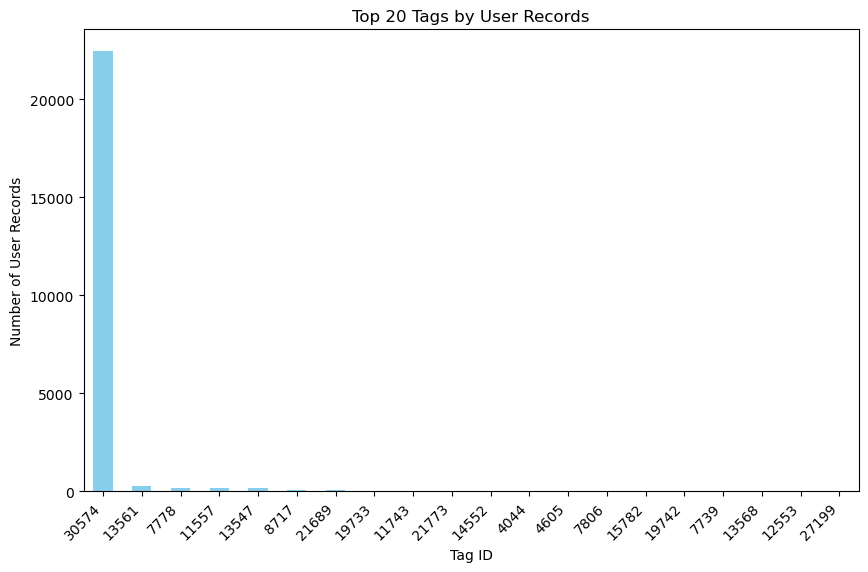

In [68]:
plt.figure(figsize=(10, 6))
top_20_tags.plot(kind='bar', color='skyblue')
plt.title('Top 20 Tags by User Records')
plt.xlabel('Tag ID')
plt.ylabel('Number of User Records')
plt.xticks(rotation=45, ha='right')
plt.show()